In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel(r"D:\DataSets-master\DataSets-master\Cricket_Data.xlsx")

In [3]:
data

,Mat,Inns,Runs,Ave,SR,CATEGORY
0,58,104,4154,41.95,51.49,TEST
1,147,143,5238,39.68,85.25,ODI
2,71,122,6147,53.92,58.22,TEST
3,211,203,9779,58.20,92.12,ODI
4,62,58,2102,48.88,136.22,T20
...,...,...,...,...,...,...
70,77,71,1825,37.24,124.31,T20
71,62,105,4809,49.57,46.90,TEST
72,25,43,1479,39.97,55.14,TEST
73,183,177,6748,44.98,87.18,ODI


In [4]:
data_unlabel=data.drop(["CATEGORY"],axis=1)

In [5]:
data_unlabel

,Mat,Inns,Runs,Ave,SR
0,58,104,4154,41.95,51.49
1,147,143,5238,39.68,85.25
2,71,122,6147,53.92,58.22
3,211,203,9779,58.20,92.12
4,62,58,2102,48.88,136.22
...,...,...,...,...,...
70,77,71,1825,37.24,124.31
71,62,105,4809,49.57,46.90
72,25,43,1479,39.97,55.14
73,183,177,6748,44.98,87.18


In [6]:
data_unlabel.describe()

,Mat,Inns,Runs,Ave,SR
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,93.253333,104.960000,3958.706667,38.392267,90.918400
std,76.785432,79.784412,3585.083627,13.147980,32.969055
min,4.000000,4.000000,61.000000,10.750000,26.700000
25%,46.500000,55.000000,1483.000000,30.870000,58.665000
50%,74.000000,86.000000,2779.000000,37.540000,87.180000
75%,111.500000,140.000000,6029.500000,46.575000,120.995000
max,463.000000,452.000000,18426.000000,99.940000,161.530000


In [7]:
data_unlabel.corr()

,Mat,Inns,Runs,Ave,SR
Mat,1.000000,0.906105,0.812367,0.354902,-0.078149
Inns,0.906105,1.000000,0.962479,0.480417,-0.337541
Runs,0.812367,0.962479,1.000000,0.623941,-0.417074
Ave,0.354902,0.480417,0.623941,1.000000,-0.392465
SR,-0.078149,-0.337541,-0.417074,-0.392465,1.000000


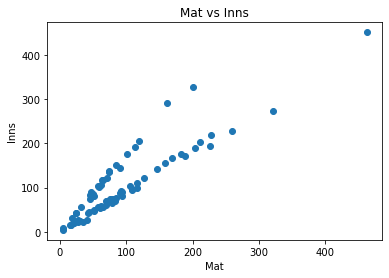

In [8]:
plt.scatter(x="Mat",y="Inns",data=data_unlabel)
plt.xlabel("Mat")
plt.ylabel("Inns")
plt.title("Mat vs Inns")
plt.show()

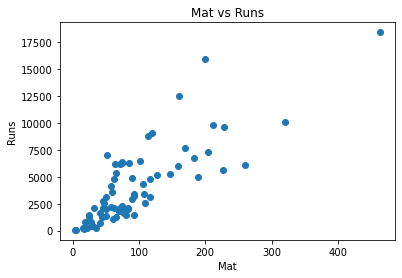

In [9]:
plt.scatter(x="Mat",y="Runs",data=data_unlabel)
plt.xlabel("Mat")
plt.ylabel("Runs")
plt.title("Mat vs Runs")
plt.show()

### Outlier detection

In [10]:
#Box plot

In [11]:
data_unlabel.head(1)

,Mat,Inns,Runs,Ave,SR
0,58,104,4154,41.95,51.49


Text(0.5, 1.0, 'box plot Mat')

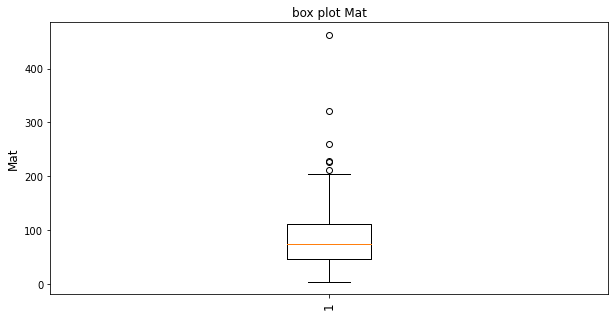

In [12]:
plt.figure(figsize=(10,5))
plt.boxplot(x="Mat",data=data_unlabel)
plt.ylabel("Mat",fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.title("box plot Mat")

Text(0.5, 1.0, 'box plot Runs')

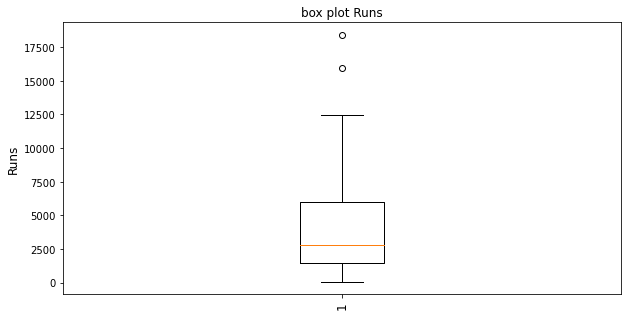

In [13]:
plt.figure(figsize=(10,5))
plt.boxplot(x="Runs",data=data_unlabel)
plt.ylabel("Runs",fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.title("box plot Runs")

Text(0.5, 1.0, 'box plot Inns')

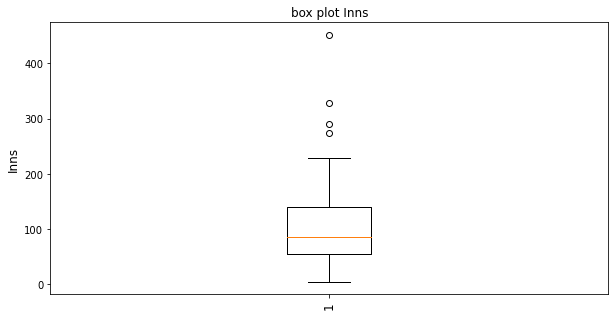

In [14]:
plt.figure(figsize=(10,5))
plt.boxplot(x="Inns",data=data_unlabel)
plt.ylabel("Inns",fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.title("box plot Inns")

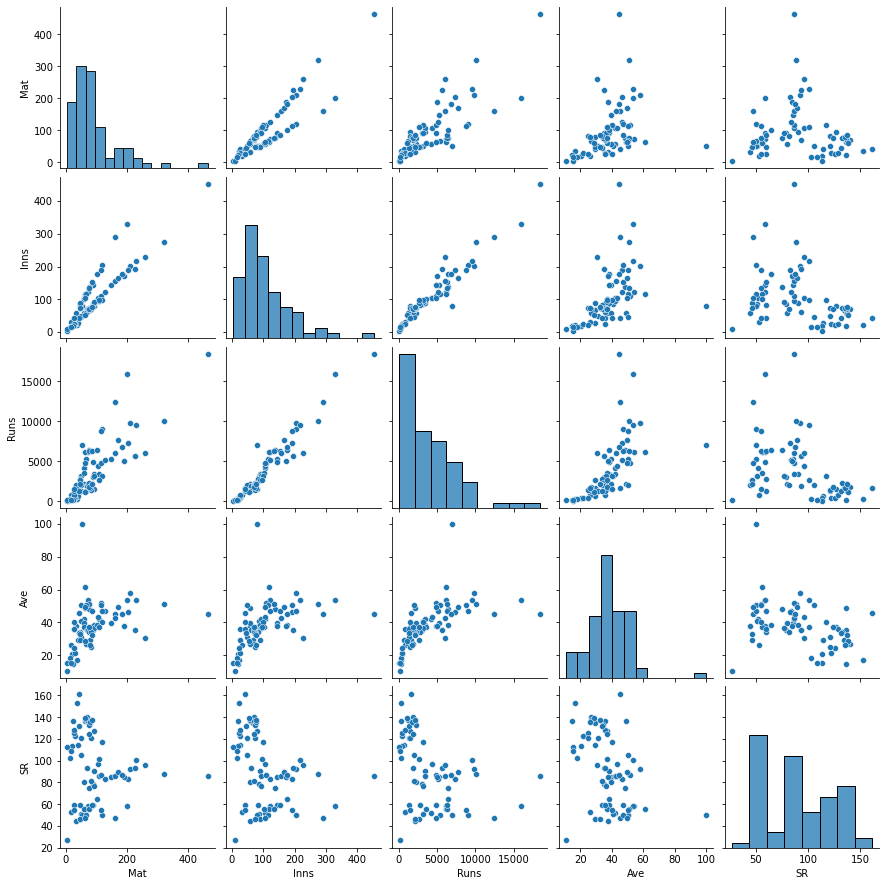

In [15]:
sb.pairplot(data_unlabel,palette=sb.color_palette("tab10"))
plt.show()

### Kmean Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmean_model=KMeans(n_clusters=3)
kmean_learner=kmean_model.fit(data_unlabel)

In [18]:
kmean_learner.cluster_centers_

array([[  136.11111111,   157.        ,  6481.48148148,    48.51407407,
           73.46777778],
       [   55.44444444,    56.91111111,  1668.53333333,    31.67955556,
          103.19666667],
       [  274.66666667,   357.33333333, 15606.33333333,    47.98666667,
           63.8       ]])

In [19]:
kmean_learner.labels_

array([0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1])

In [20]:
data_unlabel["Cluster_Id"]=kmean_learner.labels_

In [21]:
data_unlabel.head(1)

,Mat,Inns,Runs,Ave,SR,Cluster_Id
0,58,104,4154,41.95,51.49,0


In [22]:
data_unlabel["Cluster_Id"]=data_unlabel["Cluster_Id"].map({0:"Cluster1",1:"Cluster2",2:"Cluster3"})

In [23]:
data_unlabel.head(1)

,Mat,Inns,Runs,Ave,SR,Cluster_Id
0,58,104,4154,41.95,51.49,Cluster1


In [24]:
data_unlabel.groupby('Cluster_Id').agg(["mean"]).reset_index()

,Cluster_Id,Mat,Inns,Runs,Ave,SR
,,mean,mean,mean,mean,mean
0,Cluster1,136.111111,157.000000,6481.481481,48.514074,73.467778
1,Cluster2,55.444444,56.911111,1668.533333,31.679556,103.196667
2,Cluster3,274.666667,357.333333,15606.333333,47.986667,63.800000


In [25]:
kmean_learner.cluster_centers_

array([[  136.11111111,   157.        ,  6481.48148148,    48.51407407,
           73.46777778],
       [   55.44444444,    56.91111111,  1668.53333333,    31.67955556,
          103.19666667],
       [  274.66666667,   357.33333333, 15606.33333333,    47.98666667,
           63.8       ]])

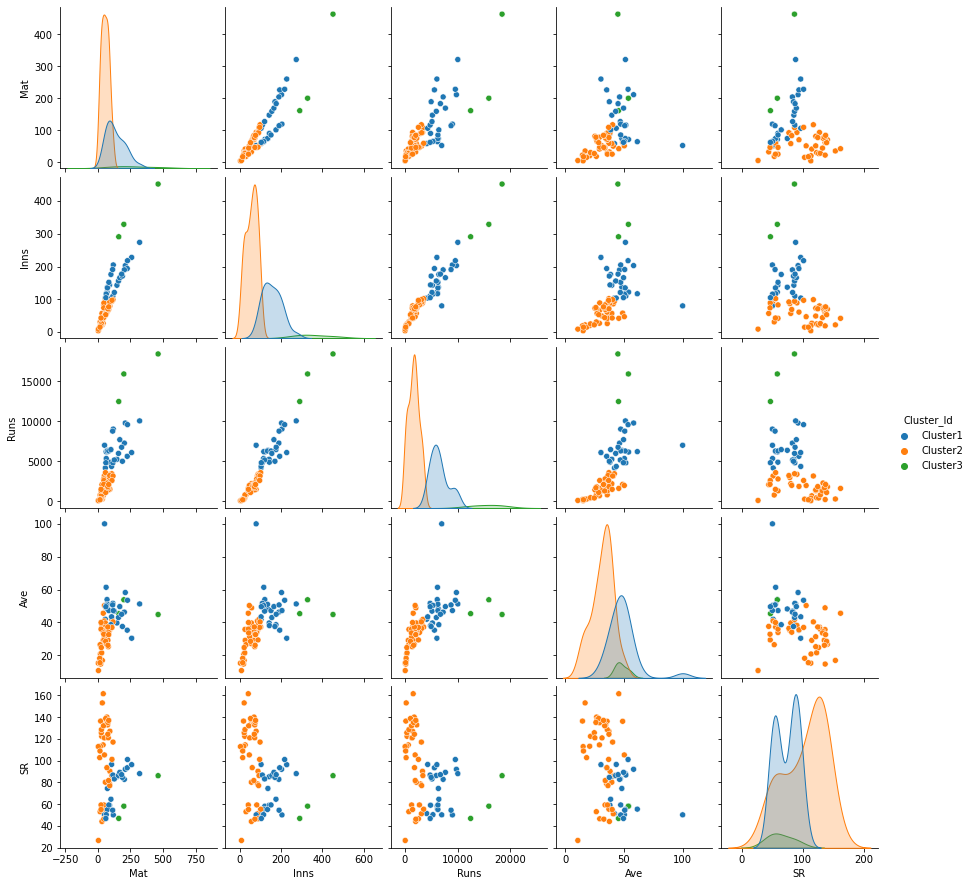

In [26]:
sb.pairplot(data_unlabel,hue="Cluster_Id")
plt.show()

In [27]:
#Error
kmean_learner.inertia_

136646128.18473917

In [28]:
# K value

In [29]:
data_unlabel.iloc[:,0:5]

,Mat,Inns,Runs,Ave,SR
0,58,104,4154,41.95,51.49
1,147,143,5238,39.68,85.25
2,71,122,6147,53.92,58.22
3,211,203,9779,58.20,92.12
4,62,58,2102,48.88,136.22
...,...,...,...,...,...
70,77,71,1825,37.24,124.31
71,62,105,4809,49.57,46.90
72,25,43,1479,39.97,55.14
73,183,177,6748,44.98,87.18


In [30]:
kmax=int(np.sqrt(len(data_unlabel)))+1
krange=list(range(1,kmax))


In [33]:
wss_list=[]
for i in range(1,kmax):
    k_model=k=KMeans(n_clusters=i)
    k_learner=k_model.fit(data_unlabel.iloc[:,0:5])
    wss=k_learner.inertia_
    wss_list.append(wss)
    print("K {} and wss {}".format(i,wss))
    

K 1 and wss 952109603.8804559
K 2 and wss 353147141.0078863
K 3 and wss 136646128.18473917
K 4 and wss 75884192.99079365
K 5 and wss 45725043.77976197
K 6 and wss 31522705.92358159
K 7 and wss 21613478.053417463
K 8 and wss 13935107.195384135


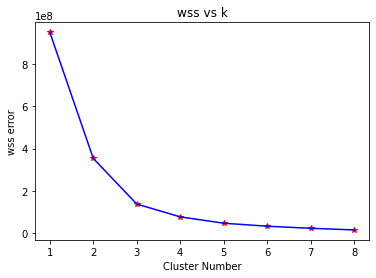

In [34]:
plt.plot(krange,wss_list,'r*')
plt.plot(krange,wss_list,'b')
plt.xlabel("Cluster Number")
plt.ylabel("wss error")
plt.title("wss vs k")
plt.show()